In [33]:

import pandas as pd

df = pd.read_csv('Data/campeonato_brasileiro_1971_1976.csv')
df

,Unnamed: 0,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,0,Série A,1971,1971-08-07,Santa Cruz,1,4,Corinthians,VV,0,3,1
1,9,Série A,1971,1971-08-07,Botafogo,0,0,America-RJ,E,1,1,10
2,7,Série A,1971,1971-08-07,Bahia,0,0,Santos,E,1,1,8
3,6,Série A,1971,1971-08-07,Sport,1,0,Flamengo,VC,3,0,7
4,5,Série A,1971,1971-08-07,São Paulo,0,3,Grêmio,VV,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,404,Série A,1976,1976-11-28,Guarani,2,3,Vasco,VV,0,3,405
2507,406,Série A,1976,1976-11-28,Atlético-MG,0,0,Grêmio,E,1,1,407
2508,408,Série A,1976,1976-12-05,Internacional,2,1,Atlético-MG,VC,3,0,409
2509,407,Série A,1976,1976-12-05,Fluminense,1,1,Corinthians,E,1,1,408


In [40]:
filt = df['Fora'] == 'Botafogo          '
df[filt]

,Unnamed: 0,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
522,293,Série A,1972,1972-11-26,ABC,2,1,Botafogo,VC,3,0,294


In [45]:
unique_values = df['Fora'].unique()
unique_values_as_strings = [str(value) for value in unique_values]
unique_values_sorted = sorted(unique_values_as_strings)
print(unique_values_sorted)

['ABC', 'America-RJ', 'Americano', 'América-MG', 'América-RN', 'Athletico-PR', 'Atlético-MG', 'Avaí', 'Bahia', 'Botafogo', 'Botafogo-PB', 'Botafogo-SP', 'CEUB', 'CRB', 'CSA', 'Campinense', 'Caxias', 'Ceará', 'Comercial-MS', 'Confiança', 'Corinthians', 'Coritiba', 'Cruzeiro', 'Desportiva Capixaba', 'Figueirense', 'Flamengo', 'Flamengo-PI', 'Fluminense', 'Fluminense-BA', 'Fortaleza', 'Goiás', 'Goiânia', 'Grêmio', 'Guarani', 'Internacional', 'Itabaiana', 'Londrina', 'Mixto-MT', 'Moto Clube', 'Nacional-AM', 'Náutico', 'Olaria', 'Operário-MS', 'Palmeiras', 'Paysandu', 'Ponte Preta', 'Portuguesa', 'Remo', 'Rio Branco-ES', 'Rio Negro-AM', 'Sampaio Corrêa', 'Santa Cruz', 'Santos', 'Sergipe', 'Sport', 'São Paulo', 'Tiradentes', 'Tiradentes-PI', 'Treze', 'Uberaba', 'Vasco', 'Vitória', 'Volta Redonda']


In [44]:


df.replace({ 'América-GB       ': 'America-RJ',  
            'América-MG      ':'América-MG',
            'Atlético-PR': 'Athletico-PR',
            'Botafogo        ': 'Botafogo',
            'Botafogo          ': 'Botafogo',
            'Ceará           ': 'Ceará',
            'Corinthians     ': 'Corinthians',
            'Grêmio          ': 'Grêmio',
            'Palmeiras       ':'Palmeiras',
            'Vasco da Gama   ': 'Vasco',
            'Santos          ': 'Santos',
            'Fluminense      ': 'Fluminense',
            
            }, inplace=True)

df

,Unnamed: 0,Comp,Temp,Data,Casa,GC,GF,Fora,Res,PC,PF,J
0,0,Série A,1971,1971-08-07,Santa Cruz,1,4,Corinthians,VV,0,3,1
1,9,Série A,1971,1971-08-07,Botafogo,0,0,America-RJ,E,1,1,10
2,7,Série A,1971,1971-08-07,Bahia,0,0,Santos,E,1,1,8
3,6,Série A,1971,1971-08-07,Sport,1,0,Flamengo,VC,3,0,7
4,5,Série A,1971,1971-08-07,São Paulo,0,3,Grêmio,VV,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,404,Série A,1976,1976-11-28,Guarani,2,3,Vasco,VV,0,3,405
2507,406,Série A,1976,1976-11-28,Atlético-MG,0,0,Grêmio,E,1,1,407
2508,408,Série A,1976,1976-12-05,Internacional,2,1,Atlético-MG,VC,3,0,409
2509,407,Série A,1976,1976-12-05,Fluminense,1,1,Corinthians,E,1,1,408


In [66]:
import pandas as pd

def update_team_stats(df):
    team_stats = {}

    for index, row in df.iterrows():
        home_team, away_team = row['Casa'], row['Fora']
        result = row['Res']

        # Update home team stats
        team_stats.setdefault(home_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[home_team]['Jogos'] += 1
        team_stats[home_team]['Gols'] += row['GC']

        if result == 'VC':
            team_stats[home_team]['Vitórias'] += 1
            team_stats[home_team]['Pontos'] += 2
        elif result == 'VV':
            team_stats[home_team]['Derrotas'] += 1
        else:
            team_stats[home_team]['Empates'] += 1
            team_stats[home_team]['Pontos'] += 1

        # Update away team stats
        team_stats.setdefault(away_team, {'Jogos': 0, 'Vitórias': 0, 'Derrotas': 0, 'Empates': 0, 'Gols': 0, 'Pontos': 0})
        team_stats[away_team]['Jogos'] += 1
        team_stats[away_team]['Gols'] += row['GF']

        if result == 'VC':
            team_stats[away_team]['Derrotas'] += 1
        elif result == 'VV':
            team_stats[away_team]['Vitórias'] += 1
            team_stats[away_team]['Pontos'] += 2
        else:
            team_stats[away_team]['Empates'] += 1
            team_stats[away_team]['Pontos'] += 1

    # Create a DataFrame with team statistics
    team_stats_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index()
    team_stats_df = team_stats_df.rename(columns={'index': 'Time', 'Jogos': 'Partidas', 'Vitórias': 'Vitórias', 'Derrotas': 'Derrotas',
                                                  'Empates': 'Empates', 'Gols': 'Gols Marcados', 'Pontos': 'Pontuação'})

    # Calculating the percentage of victories, draws, and losses
    team_stats_df['Percentual Vitórias'] = (team_stats_df['Vitórias'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Empates'] = (team_stats_df['Empates'] / team_stats_df['Partidas']) * 100
    team_stats_df['Percentual Derrotas'] = (team_stats_df['Derrotas'] / team_stats_df['Partidas']) * 100

    # Calculating the percentage of total points based on the maximum possible points
    max_possible_points = team_stats_df['Partidas'] * 2
    team_stats_df['Aproveitamento'] = (team_stats_df['Pontuação'] / max_possible_points) * 100
    team_stats_df = team_stats_df.sort_values(by='Aproveitamento', ascending=False)

    return team_stats_df

# Example usage:
team_stats_df = update_team_stats(df)
print(team_stats_df)
team_stats_df.to_csv('Data/estatisticas_brasileirao_1971_1976.csv')
team_stats_df.to_excel('Data/estatisticas_brasileirao_1971_1976.csv')


             Time  Partidas  Vitórias  Derrotas  Empates  Gols Marcados  \
16  Internacional       174        90        28       56            257   
14      Palmeiras       166        79        29       58            213   
19       Cruzeiro       161        74        27       60            206   
9          Grêmio       163        76        38       49            182   
1     Corinthians       165        71        36       58            190   
..            ...       ...       ...       ...      ...            ...   
41      Itabaiana        19         5        14        0             11   
54          Treze        12         3         9        0              9   
39     Moto Clube        42         2        25       15             24   
22        Sergipe        69         8        47       14             36   
48     Campinense        16         0        12        4             13   

    Pontuação  Percentual Vitórias  Percentual Empates  Percentual Derrotas  \
16        236       

ValueError: No engine for filetype: 'csv'

In [67]:
team_stats_df.head(30)

,Time,Partidas,Vitórias,Derrotas,Empates,Gols Marcados,Pontuação,Percentual Vitórias,Percentual Empates,Percentual Derrotas,Aproveitamento
16,Internacional,174,90,28,56,257,236,51.724138,32.183908,16.091954,67.816092
14,Palmeiras,166,79,29,58,213,216,47.590361,34.939759,17.469880,65.060241
19,Cruzeiro,161,74,27,60,206,208,45.962733,37.267081,16.770186,64.596273
9,Grêmio,163,76,38,49,182,201,46.625767,30.061350,23.312883,61.656442
1,Corinthians,165,71,36,58,190,200,43.030303,35.151515,21.818182,60.606061
5,Santos,145,63,35,47,189,173,43.448276,32.413793,24.137931,59.655172
8,São Paulo,159,62,32,65,194,189,38.993711,40.880503,20.125786,59.433962
10,Atlético-MG,158,67,39,52,220,186,42.405063,32.911392,24.683544,58.860759
50,Botafogo-PB,12,5,3,4,16,14,41.666667,33.333333,25.000000,58.333333
7,Flamengo,147,65,44,38,188,168,44.217687,25.850340,29.931973,57.142857


In [68]:
filt = (team_stats_df['Partidas'] > 100)
team_stats_df = team_stats_df[filt]

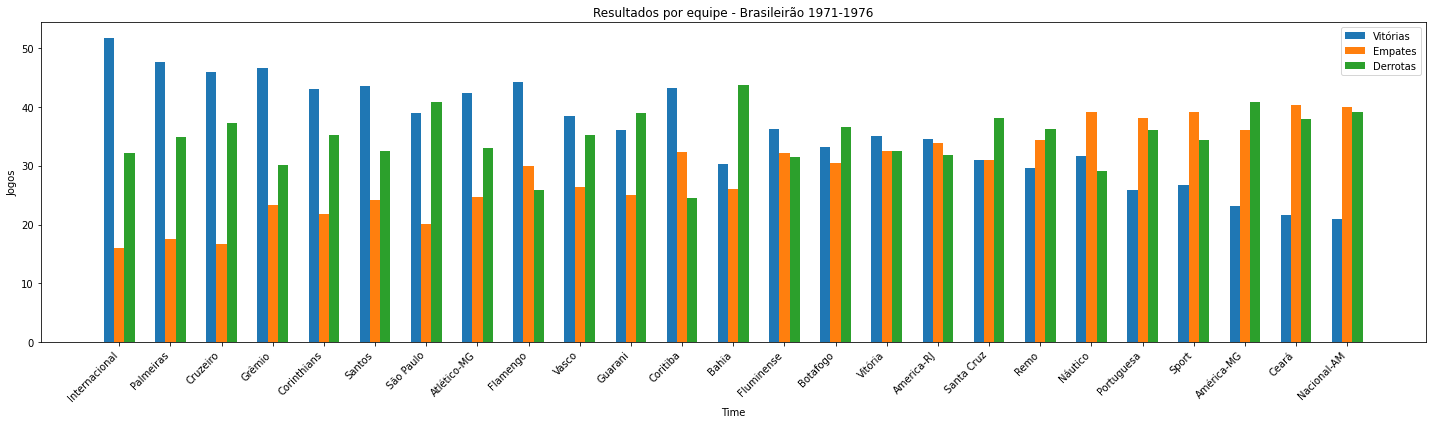

In [69]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victories = team_stats_df['Percentual Vitórias']
draws = team_stats_df['Percentual Derrotas']
losses = team_stats_df['Percentual Empates']

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(20, 6))

bar_width = 0.2
index = range(len(teams))

bar1 = ax.bar(index, victories, bar_width, label='Vitórias')
bar2 = ax.bar([i + bar_width for i in index], draws, bar_width, label='Empates')
bar3 = ax.bar([i + 2 * bar_width for i in index], losses, bar_width, label='Derrotas')

# Adding labels, title, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Jogos')
ax.set_title('Resultados por equipe - Brasileirão 1971-1976')
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()

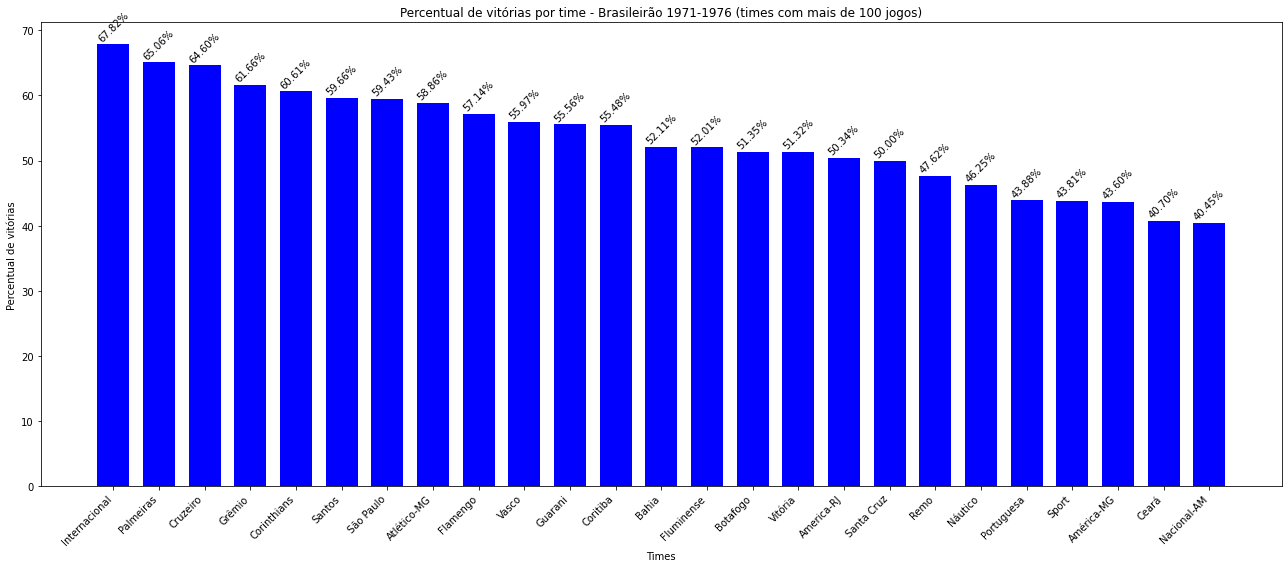

In [70]:
import matplotlib.pyplot as plt

# Assuming team_stats_df is your DataFrame with team statistics
teams = team_stats_df['Time']
victory_percentage = team_stats_df['Aproveitamento']

# Sort teams by the percentage of victories
sorted_indices = victory_percentage.argsort()[::-1]
sorted_teams = teams.iloc[sorted_indices]
sorted_percentages = victory_percentage.iloc[sorted_indices]

# Plotting a bar chart
fig, ax = plt.subplots(figsize=(18, 8))  # Increase figsize for more spacing

bar_width = 0.7  # Increase bar_width for more spacing
index = range(len(sorted_teams))

# Change the color to blue
bars = ax.bar(index, sorted_percentages, bar_width, color='blue')

# Adding labels, title, and legend
ax.set_xlabel('Times')
ax.set_ylabel('Percentual de vitórias')
ax.set_title('Percentual de vitórias por time - Brasileirão 1971-1976 (times com mais de 100 jogos)')
ax.set_xticks(index)
ax.set_xticklabels(sorted_teams, rotation=45, ha='right')

# Display the percentages on top of the bars with rotation
for bar, percentage in zip(bars, sorted_percentages):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{percentage:.2f}%', ha='center', rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
